In [1]:
# Figure: Retrieval Effectiveness over time

In [2]:
#!pip install trectools

from trectools import TrecQrel, TrecRun, TrecEval

In [81]:
QREL_DIR='../../Data/navigational-topics-and-qrels-ms-marco-v1/'
QREL_DIR_MARCO_V2='../../Data/navigational-topics-and-qrels-ms-marco-v2/'

RUN_DIR='/mnt/ceph/storage/data-in-progress/data-teaching/theses/wstud-thesis-probst/retrievalExperiments/runs-ecir22/'
RUN_DIR_MARCO_V2='/mnt/ceph/storage/data-in-progress/data-teaching/theses/wstud-thesis-probst/retrievalExperiments/runs-marco-v2-ecir22/'

TOPIC_TO_NAME={'entrypage-random': 'Random@V1', 'entrypage-popular': 'Popular@V1'}
QRELS={i: TrecQrel(QREL_DIR + 'qrels.msmarco-' + i + '.txt') for i in TOPIC_TO_NAME.keys()}
QRELS_MARCO_V2={i: TrecQrel(QREL_DIR_MARCO_V2 + 'qrels.msmarco-v2-' + i + '.txt') for i in TOPIC_TO_NAME.keys()}

In [9]:
APPROACH_TO_MARCO_V1_RUN_FILE={
    'BM25@2016-07': 'run.intersection-index-2016-07-v1.bm25-default.txt',
    'BM25@2017-04': 'run.intersection-index-2017-04-v1.bm25-default.txt',
    'BM25@2018-13': 'run.intersection-index-2018-13-v1.bm25-default.txt',
    'BM25@2019-47': 'run.intersection-index-2019-47-v1.bm25-default.txt',
    'BM25@2020-05': 'run.intersection-index-2020-05-v1.bm25-default.txt',
    'BM25@2021-04': 'run.intersection-index-2021-04-v1.bm25-default.txt',
    'BM25@16--21': 'run.intersection-index-union-2016-to-2021-v1.bm25-default.txt',
}

APPROACH_TO_MARCO_V2_RUN_FILE={
    'BM25@2016-07': 'run.intersection-index-2016-07-v2.bm25-default.txt',
    'BM25@2017-04': 'run.intersection-index-2017-04-v2.bm25-default.txt',
    'BM25@2018-13': 'run.intersection-index-2018-13-v2.bm25-default.txt',
    'BM25@2019-47': 'run.intersection-index-2019-47-v2.bm25-default.txt',
    'BM25@2020-05': 'run.intersection-index-2020-05-v2.bm25-default.txt',
    'BM25@2021-04': 'run.intersection-index-2021-04-v2.bm25-default.txt',
    'BM25@16--21': 'run.intersection-index-union-2016-to-2021-v2.bm25-default.txt',
}

In [58]:
# Topics to remove V1

QUERIES_TO_REMOVE_V1 = {'entrypage-random': set(), 'entrypage-popular': set()}
RETRIEVED_DOCS_V1 = {'entrypage-random': {}, 'entrypage-popular': {}}

for run_file in APPROACH_TO_MARCO_V1_RUN_FILE.values():
    for topics in ['entrypage-random', 'entrypage-popular']:
        run = TrecRun(RUN_DIR + topics + '-over-time/' + run_file)
        tmp = run.run_data[['query', 'system']].groupby('query').count().to_dict()['system']
        for topic in range(100):
            if topic not in tmp or tmp[topic] < 10:
               QUERIES_TO_REMOVE_V1[topics].add(topic)
            
            if topic not in RETRIEVED_DOCS_V1[topics]:
                RETRIEVED_DOCS_V1[topics][topic] = set()
            
            for doc_id in run.run_data[run.run_data['query'] == topic].docid.unique():
                RETRIEVED_DOCS_V1[topics][topic].add(doc_id)

for topics, qrels in QRELS.items():
    for _, qrel in qrels.qrels_data.iterrows():
        if qrel['docid'] not in RETRIEVED_DOCS_V1[topics][qrel['query']]:
            QUERIES_TO_REMOVE_V1[topics].add(qrel['query'])


In [61]:
QUERIES_TO_REMOVE_V1

{'entrypage-random': {0,
  1,
  15,
  19,
  20,
  22,
  23,
  27,
  29,
  32,
  35,
  36,
  38,
  40,
  41,
  42,
  45,
  51,
  53,
  58,
  65,
  73,
  74,
  75,
  96,
  97,
  99},
 'entrypage-popular': {2,
  5,
  9,
  17,
  24,
  27,
  28,
  31,
  35,
  37,
  41,
  42,
  46,
  57,
  58,
  60,
  67,
  79,
  91,
  99}}

In [60]:
# Topics to remove V1

QUERIES_TO_REMOVE_V2 = {'entrypage-random': set(), 'entrypage-popular': set()}
RETRIEVED_DOCS_V2 = {'entrypage-random': {}, 'entrypage-popular': {}}

for run_file in APPROACH_TO_MARCO_V2_RUN_FILE.values():
    for topics in ['entrypage-random', 'entrypage-popular']:
        run = TrecRun(RUN_DIR_MARCO_V2 + topics + '-over-time/' + run_file)
        tmp = run.run_data[['query', 'system']].groupby('query').count().to_dict()['system']
        for topic in range(100):
            if topic not in tmp or tmp[topic] < 10:
               QUERIES_TO_REMOVE_V2[topics].add(topic)
            
            if topic not in RETRIEVED_DOCS_V2[topics]:
                RETRIEVED_DOCS_V2[topics][topic] = set()
            
            for doc_id in run.run_data[run.run_data['query'] == topic].docid.unique():
                RETRIEVED_DOCS_V2[topics][topic].add(doc_id)

for topics, qrels in QRELS_MARCO_V2.items():
    for _, qrel in qrels.qrels_data.iterrows():
        if qrel['docid'] not in RETRIEVED_DOCS_V2[topics][qrel['query']]:
            QUERIES_TO_REMOVE_V2[topics].add(qrel['query'])


In [62]:
QUERIES_TO_REMOVE_V2

{'entrypage-random': {0,
  1,
  6,
  12,
  15,
  19,
  20,
  22,
  23,
  27,
  29,
  32,
  35,
  36,
  38,
  40,
  41,
  42,
  45,
  51,
  53,
  58,
  59,
  64,
  65,
  73,
  74,
  75,
  81,
  86,
  91,
  96,
  97,
  99},
 'entrypage-popular': {2,
  5,
  9,
  17,
  24,
  27,
  28,
  31,
  35,
  38,
  41,
  42,
  46,
  58,
  60,
  67,
  79,
  95,
  99}}

In [82]:
QRELS['entrypage-random'].qrels_data = QRELS['entrypage-random'].qrels_data[~(QRELS['entrypage-random'].qrels_data['query'].isin(QUERIES_TO_REMOVE_V1['entrypage-random']))]
QRELS['entrypage-popular'].qrels_data = QRELS['entrypage-popular'].qrels_data[~(QRELS['entrypage-popular'].qrels_data['query'].isin(QUERIES_TO_REMOVE_V1['entrypage-popular']))]

In [83]:
print(len(QRELS['entrypage-random'].qrels_data))
print(len(QRELS['entrypage-popular'].qrels_data))

73
80


In [85]:
QRELS_MARCO_V2['entrypage-random'].qrels_data = QRELS_MARCO_V2['entrypage-random'].qrels_data[~(QRELS_MARCO_V2['entrypage-random'].qrels_data['query'].isin(QUERIES_TO_REMOVE_V2['entrypage-random']))]
QRELS_MARCO_V2['entrypage-popular'].qrels_data = QRELS_MARCO_V2['entrypage-popular'].qrels_data[~(QRELS_MARCO_V2['entrypage-popular'].qrels_data['query'].isin(QUERIES_TO_REMOVE_V2['entrypage-popular']))]

In [86]:
print(len(QRELS_MARCO_V2['entrypage-random'].qrels_data))
print(len(QRELS_MARCO_V2['entrypage-popular'].qrels_data))

66
81


In [90]:
def recall(trec_eval, depth):
    import pandas as pd
    trecformat = trec_eval.run.run_data.sort_values(["query", "score", "docid"], ascending=[True,False,False]).reset_index()
    topX = trecformat.groupby("query")[["query","docid"]].head(depth)
    merged = pd.merge(topX[["query","docid"]], trec_eval.qrels.qrels_data[["query","docid","rel"]])

    nqueries = len(trec_eval.qrels.topics())
    result = merged[merged["rel"]>0].groupby("query")["rel"].count()
    
    return result.sum()/nqueries

def is_anchor_text(run_file):
    return '-anchortext' in run_file

def format_score(score, run_file, topics, position):
    # Manually maintained
    if is_anchor_text(run_file):
        max_scores = {
            'entrypage-random': [0.74, 0.82, 0.88, 0.61, 0.69, 0.8],
            'entrypage-popular': [0.62, 0.71, 0.85, 0.56, 0.63, 0.79],
        }
    else:
        max_scores =  {
            'entrypage-random': [0.59, 0.63, 0.69, 0.55, 0.58, 0.65],
            'entrypage-popular': [0.28, 0.32, 0.43, 0.27, 0.32, 0.43],
        }
        
    ret = '{:.2f}'.format(score)
    if max_scores[topics][position] <= score:
        return '{\\textbf{' + ret + '}} '
    else:
        return ret

def eval_on_marco_v1(run_file, year):
    for topics in ['entrypage-random', 'entrypage-popular']:
        run = TrecRun(RUN_DIR + topics + '-over-time/' + run_file)
        trec_eval=TrecEval(run, QRELS[topics])
        
        yield {
            'year': year,
            'dataset': 'ms-marco-v1',
            'topics': topics,
            'recall_10': recall(trec_eval, 10)
        }

def eval_on_marco_v2(run_file, year):
    for topics in ['entrypage-random', 'entrypage-popular']:
        run = TrecRun(RUN_DIR_MARCO_V2 + topics + '-over-time/' + run_file)
        trec_eval=TrecEval(run, QRELS_MARCO_V2[topics])
        yield {
            'year': year,
            'dataset': 'ms-marco-v2',
            'topics': topics,
            'recall_10': recall(trec_eval, 10)
        }

def table_row(approach):
    v1_eval = ' & --- & --- & --- & --- & --- & --- &'
    
    if approach in APPROACH_TO_MARCO_V1_RUN_FILE:
        v1_eval = eval_on_marco_v1(APPROACH_TO_MARCO_V1_RUN_FILE[approach])
    
    v2_eval = ' --- & --- & --- & --- & --- & ---'
    
    if approach in APPROACH_TO_MARCO_V2_RUN_FILE:
        v2_eval = eval_on_marco_v2(APPROACH_TO_MARCO_V2_RUN_FILE[approach])
    
    return '& ' + approach + v1_eval + v2_eval + ' \\\\'


def df_entry_page_retrieval_effectiveness():
    import pandas as pd
    ret = []
    for year, name in [(2016, 'BM25@2016-07'), (2017, 'BM25@2017-04'), (2018, 'BM25@2018-13'), (2019, 'BM25@2019-47'), (2020, 'BM25@2020-05'), (2021, 'BM25@2021-04')]:
        for i in eval_on_marco_v1(APPROACH_TO_MARCO_V1_RUN_FILE[name], year):
            ret += [i]
        for i in eval_on_marco_v2(APPROACH_TO_MARCO_V2_RUN_FILE[name], year):
            ret += [i]

    return pd.DataFrame(ret)

df = df_entry_page_retrieval_effectiveness()

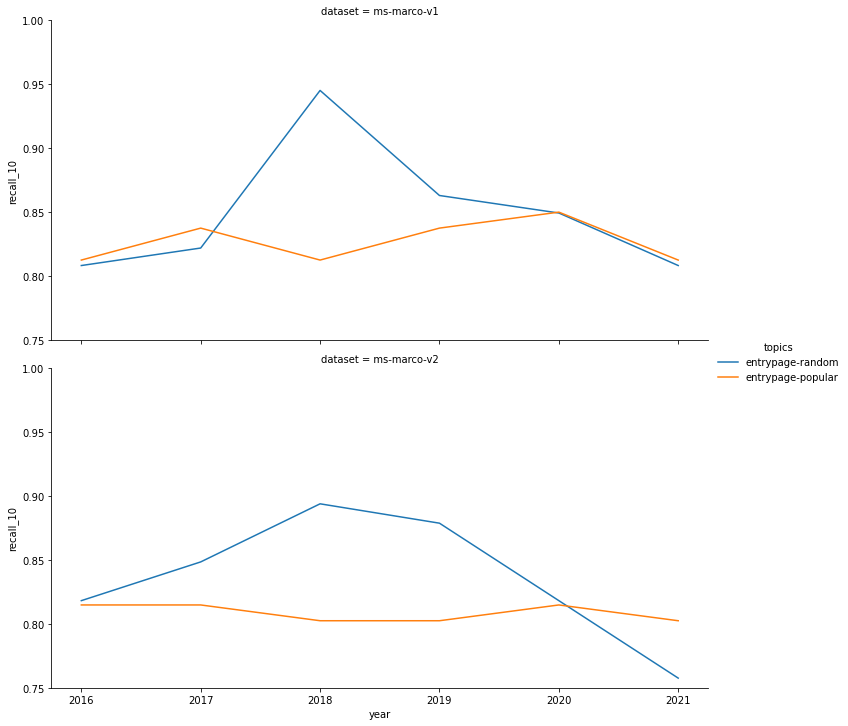

In [117]:
import seaborn as sns

g = sns.relplot(data=df, y='recall_10', x='year',hue='topics', row='dataset', kind='line', aspect=2)
g.set(ylim=(0.75, 1.0))
g.savefig('figure-retrieval-effectiveness-over-time.pdf')

g